In [1]:
import pandas as pd

import ast

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jesse\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply( lambda a : ast.literal_eval(a) if pd.notna(a) else a) 

In [2]:
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_us['month_number'] = df_us['job_posted_date'].dt.month

df_us.groupby('month_number').size()

month_number
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [3]:


df_us_exp = df_us.explode('job_skills')

df_us_exp = df_us_exp.dropna(subset='job_skills')

df_us_exp

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_number
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,powerpoint,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['...",7
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,NaN,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ...",1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,NaN,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ...",1


In [4]:
df_us_exp = df_us_exp.pivot_table(index='month_number',columns='job_skills',aggfunc='size', fill_value=0)

df_us_exp.loc['Total'] = df_us_exp.sum()

df_us_exp = df_us_exp[df_us_exp.loc['Total'].sort_values(ascending= False).index]

In [5]:
df_us_exp = df_us_exp.drop('Total')

df_us_exp

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
month_number,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_us_exp = df_us_exp.iloc[:, :5]

In [7]:
df_us.groupby('month_number').size()

counts_se = df_us.groupby('month_number').size()

In [8]:
df_us_exp.div(counts_se/100, axis=0)

df_us_exp_perc = df_us_exp.div(counts_se/100, axis=0)

In [9]:
df_us_exp_perc = df_us_exp_perc.reset_index()

df_us_exp_perc['job_posted_month'] = df_us_exp_perc['month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

df_us_exp_perc = df_us_exp_perc.set_index('job_posted_month')

df_plot = df_us_exp_perc.drop(columns='month_number')

df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


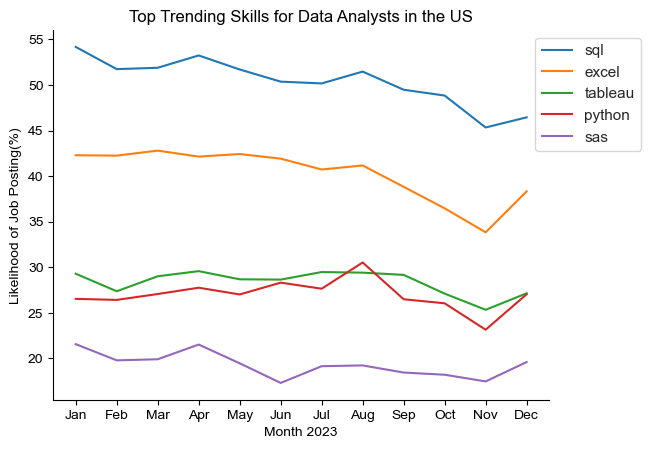

In [10]:
sns.lineplot(data= df_plot, dashes= False, palette= 'tab10')
sns.set_theme(style= 'ticks')
sns.despine()


plt.title('Top Trending Skills for Data Analysts in the US')
plt.xlabel('Month 2023')
plt.ylabel('Likelihood of Job Posting(%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()